# **Import and Read the Dataset**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats

%matplotlib inline

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab çalışma/Neıman/co2/co2.csv')

In [ ]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6582,BMW,750i xDrive Sedan,FULL-SIZE,4.4,8,AS8,Z,14.5,9.9,12.4,23,290
1620,INFINITI,Q50,MID-SIZE,3.7,6,AS7,Z,12.0,8.1,10.3,27,237
12,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
2631,FORD,MUSTANG CONVERTIBLE,SUBCOMPACT,2.3,4,AS6,X,11.6,8.0,10.0,28,234
4411,AUDI,Q3 QUATTRO,COMPACT,2.0,4,AS6,Z,11.9,8.4,10.3,27,240


In [ ]:
#control null value
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0
Fuel Consumption Comb (L/100 km),0,0.0


In [ ]:
#control duplicated
df.duplicated().sum()

1103

In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
12,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
15,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [ ]:
def get_unique_values(df):

    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [ ]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Make,42,-,object
1,Model,2053,-,object
2,Vehicle Class,16,-,object
3,Engine Size(L),51,-,float64
4,Cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,Transmission,27,-,object
6,Fuel Type,5,"[Z, D, X, E, N]",object
7,Fuel Consumption City (L/100 km),211,-,float64
8,Fuel Consumption Hwy (L/100 km),143,-,float64
9,Fuel Consumption Comb (L/100 km),181,-,float64


In [ ]:
# summary of Numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [ ]:
#summary of Object features
df.describe(include= 'object').T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


# **Rename Columns**

In [ ]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [ ]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

# **Data Visualisation**

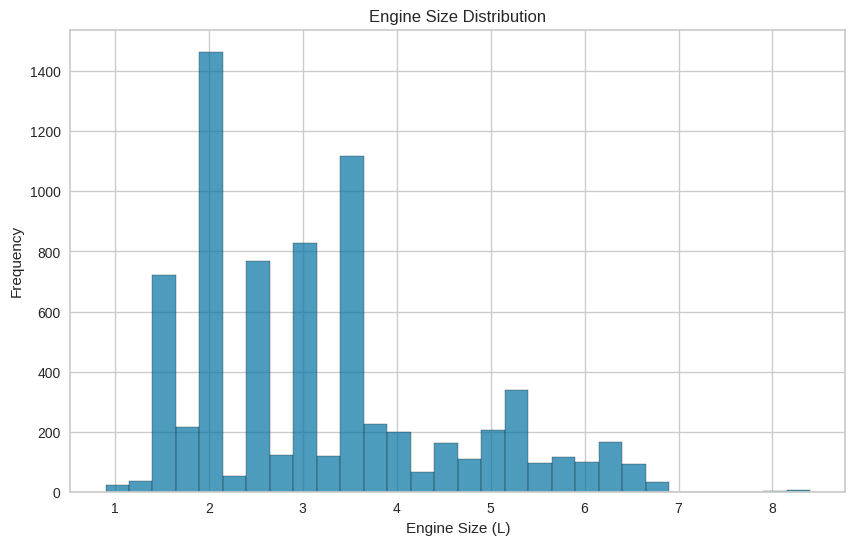

In [ ]:
import plotly.express as px
import scipy.stats as stats
%matplotlib inline

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['engine_size'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Engine Size Distribution')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


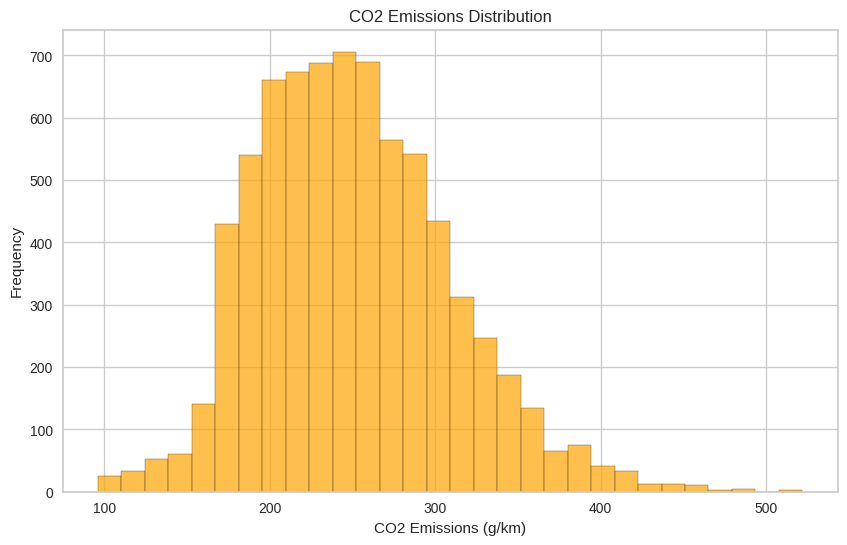

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['co2'], bins=30, edgecolor='k', alpha=0.7, color='orange')
plt.title('CO2 Emissions Distribution')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

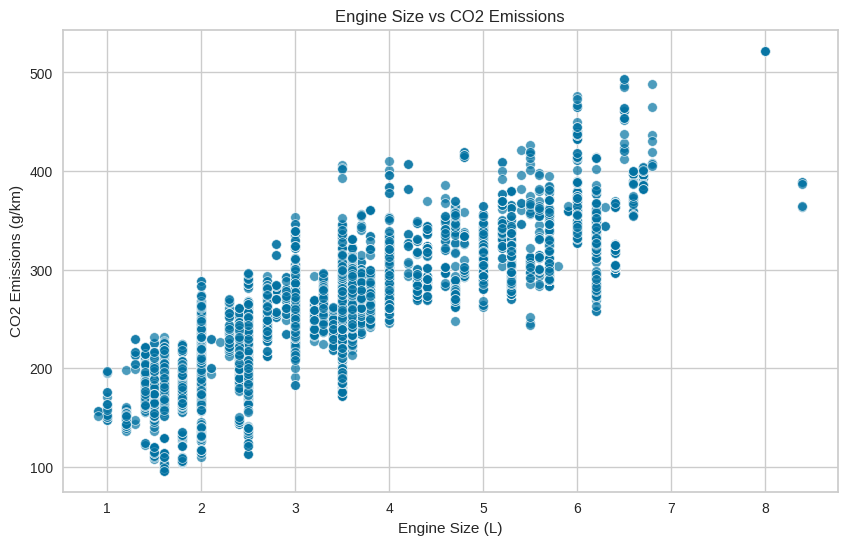

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_size', y='co2', data=df, alpha=0.7)
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

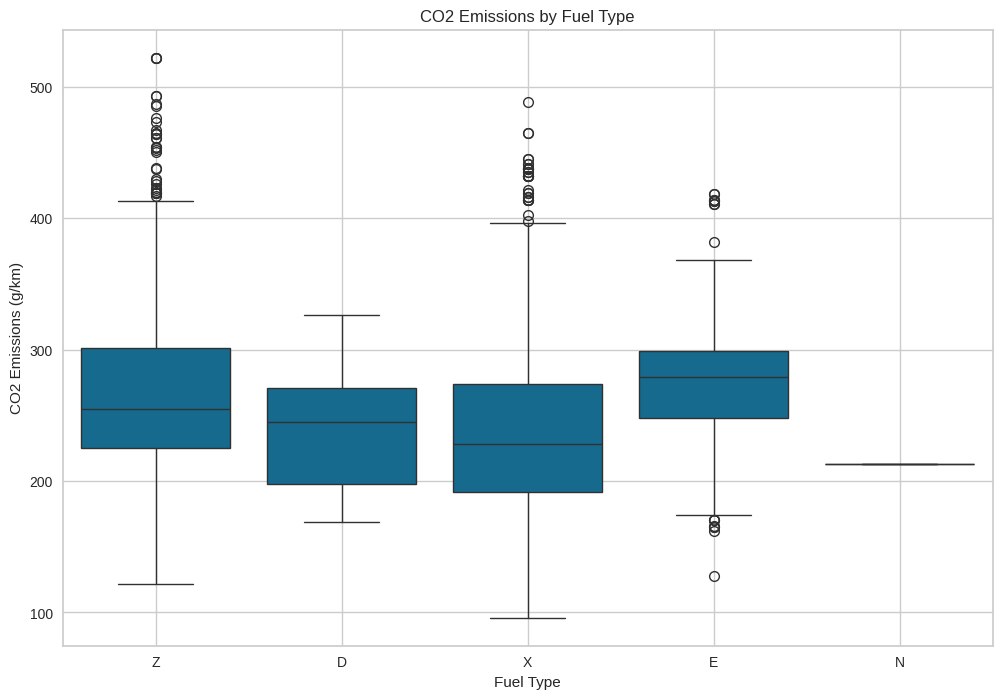

In [ ]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel_type', y='co2', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

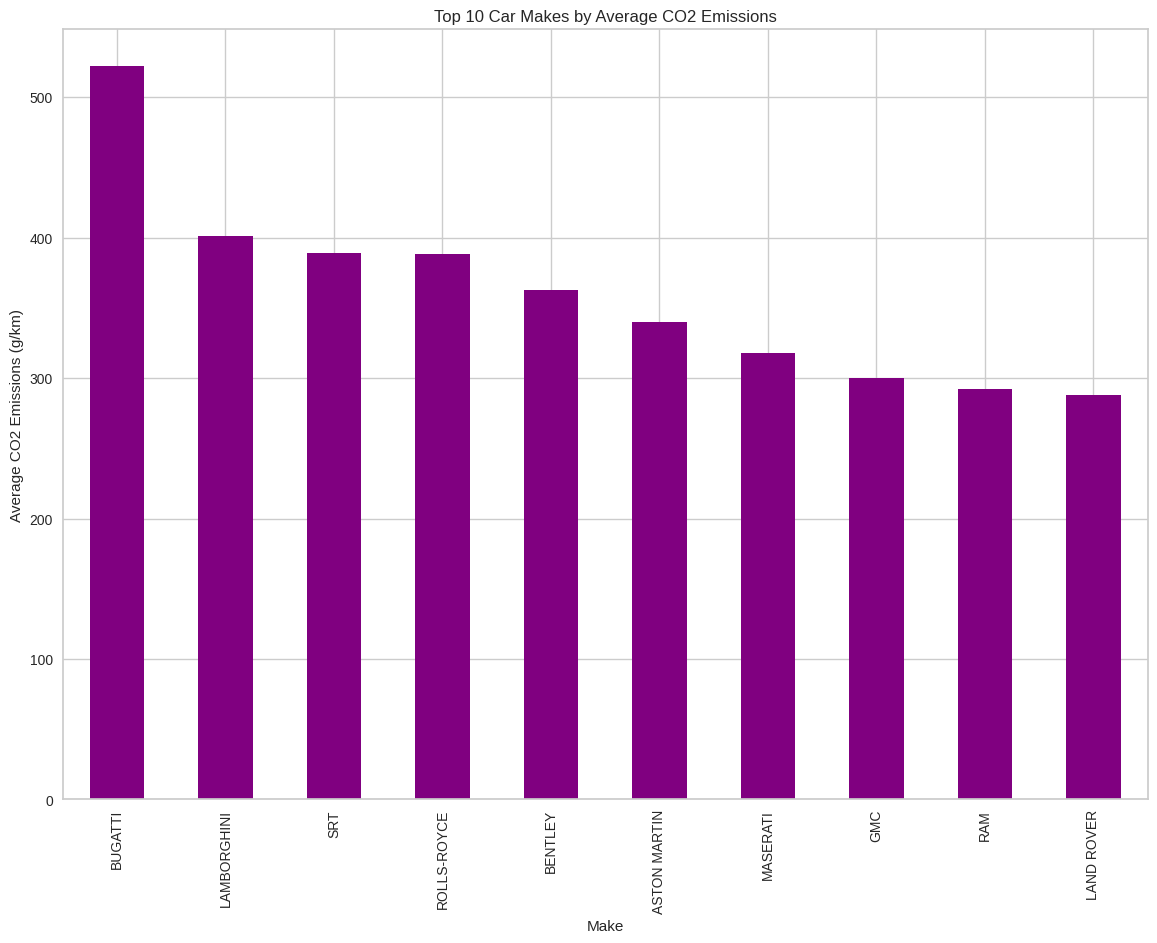

In [ ]:
# Bar Plot
plt.figure(figsize=(14, 10))
average_co2_by_make = df.groupby('make')['co2'].mean().sort_values(ascending=False).head(10)
average_co2_by_make.plot(kind='bar', color='purple')
plt.title('Top 10 Car Makes by Average CO2 Emissions')
plt.xlabel('Make')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

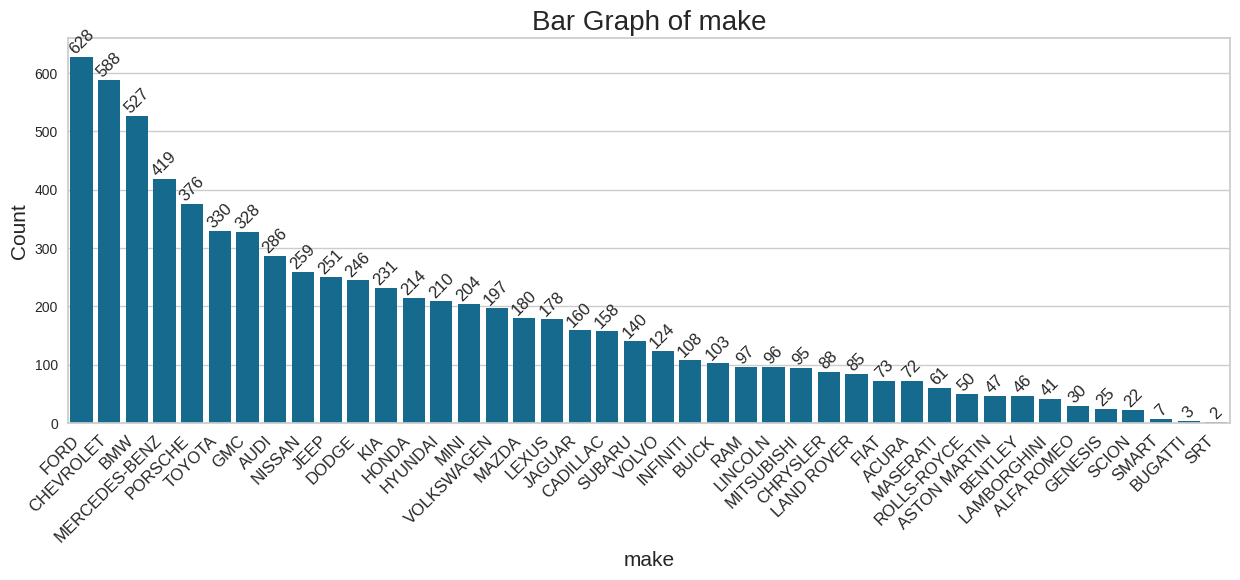

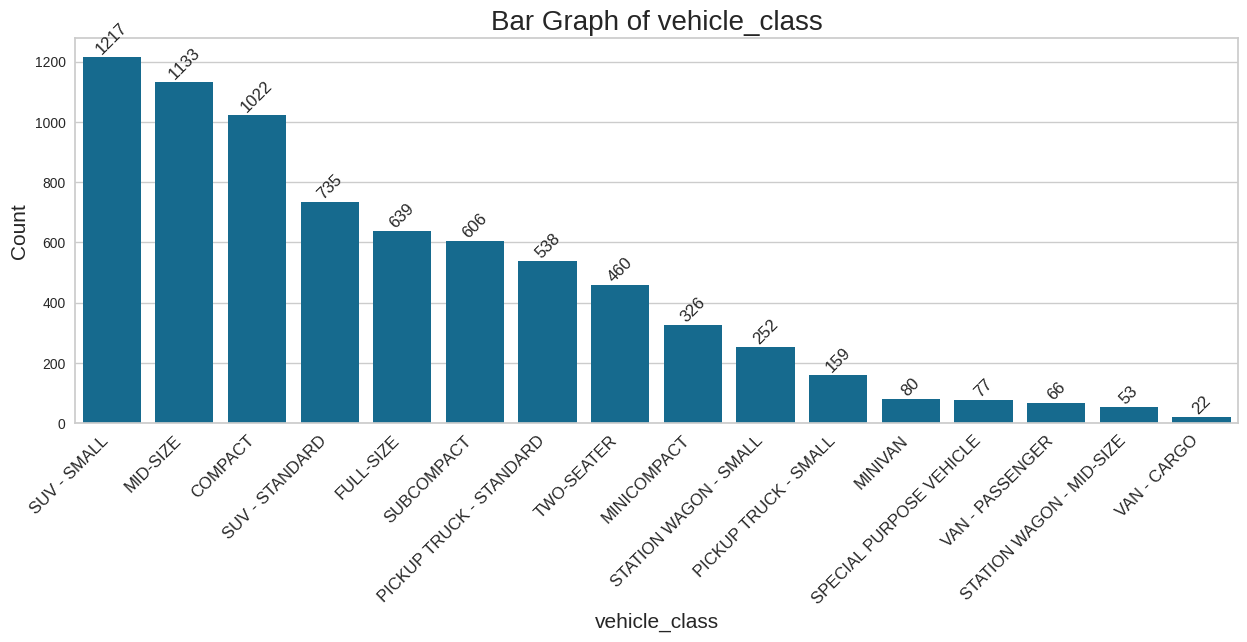

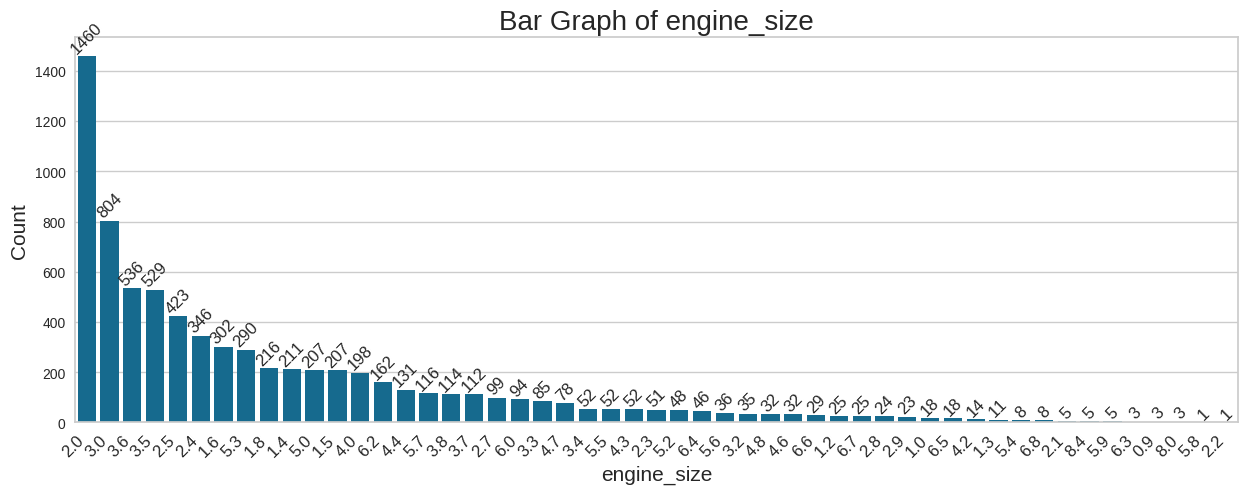

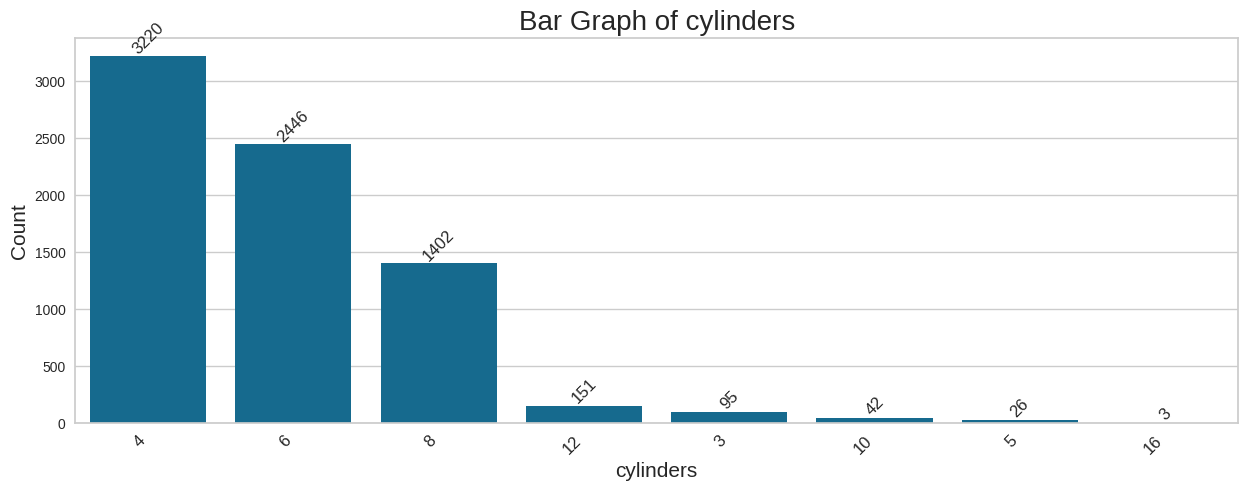

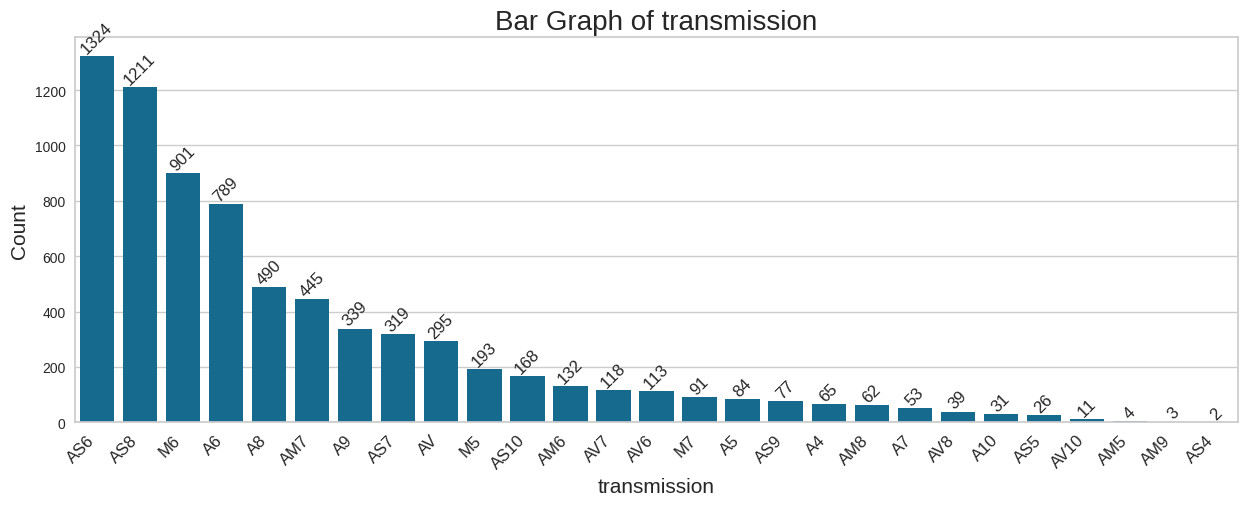

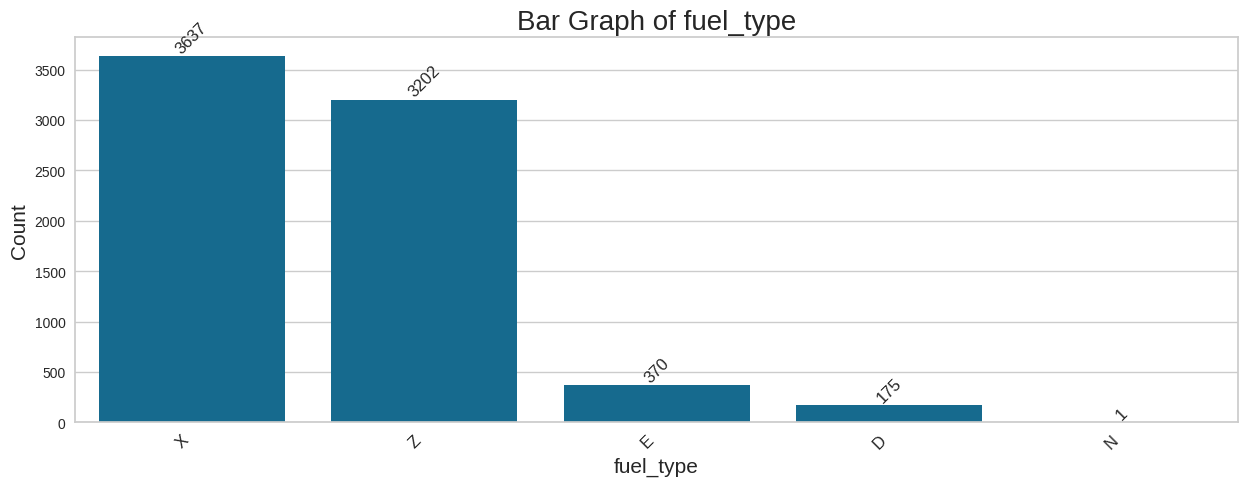

In [ ]:
# Let's look at the distribution of our categorical characteristics with a bar graph

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

cat_features = ['make','vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

plot_bar_graphs(df, cat_features)

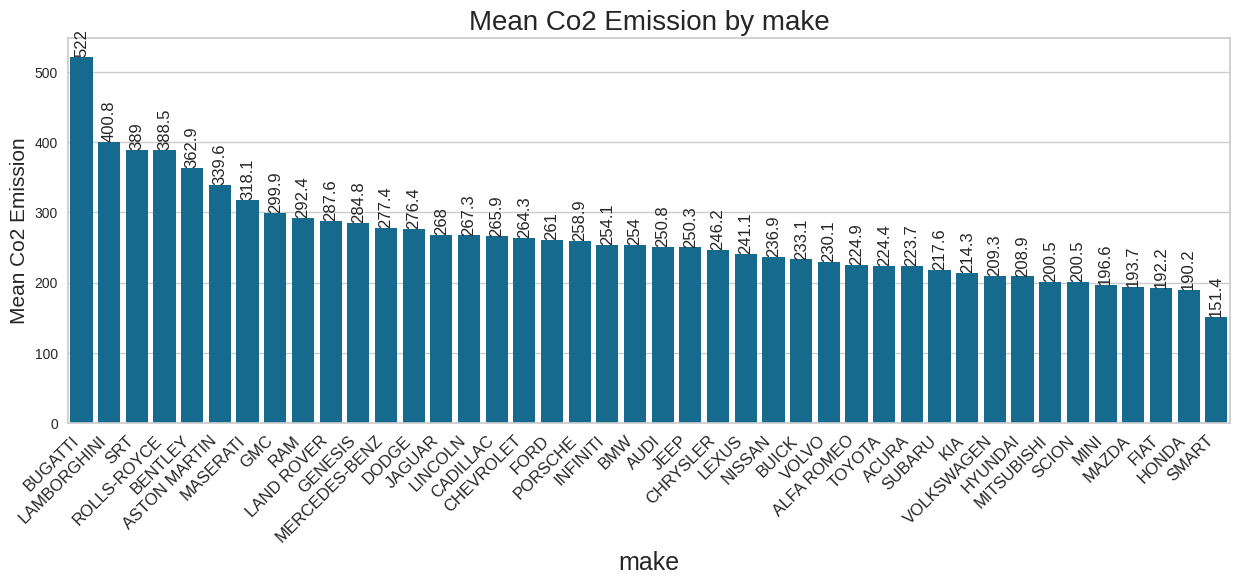

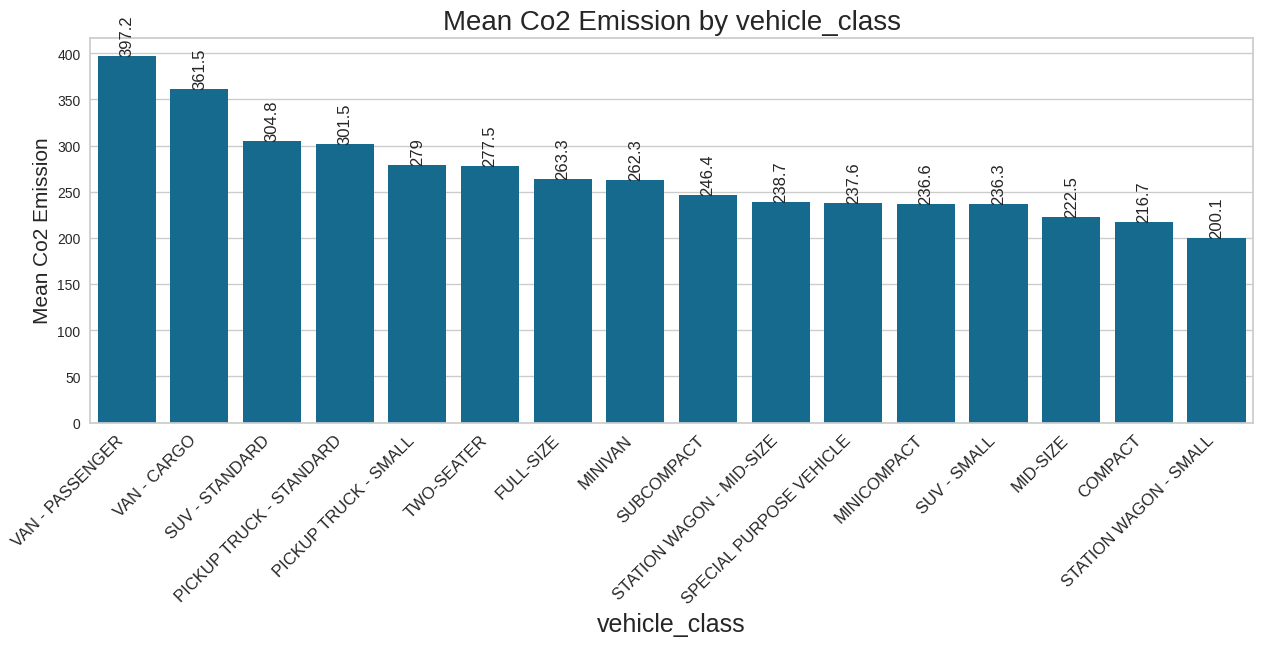

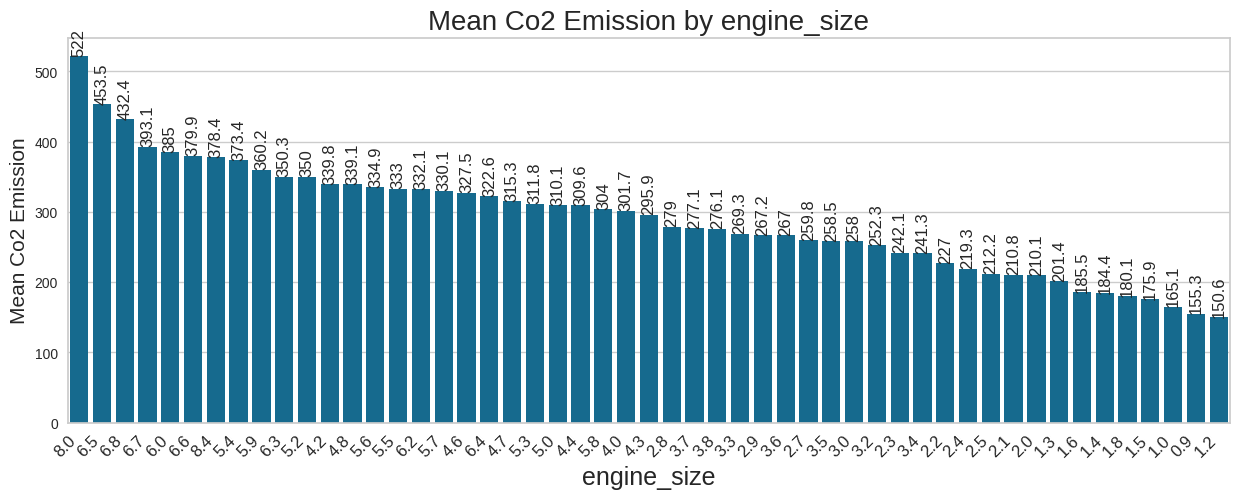

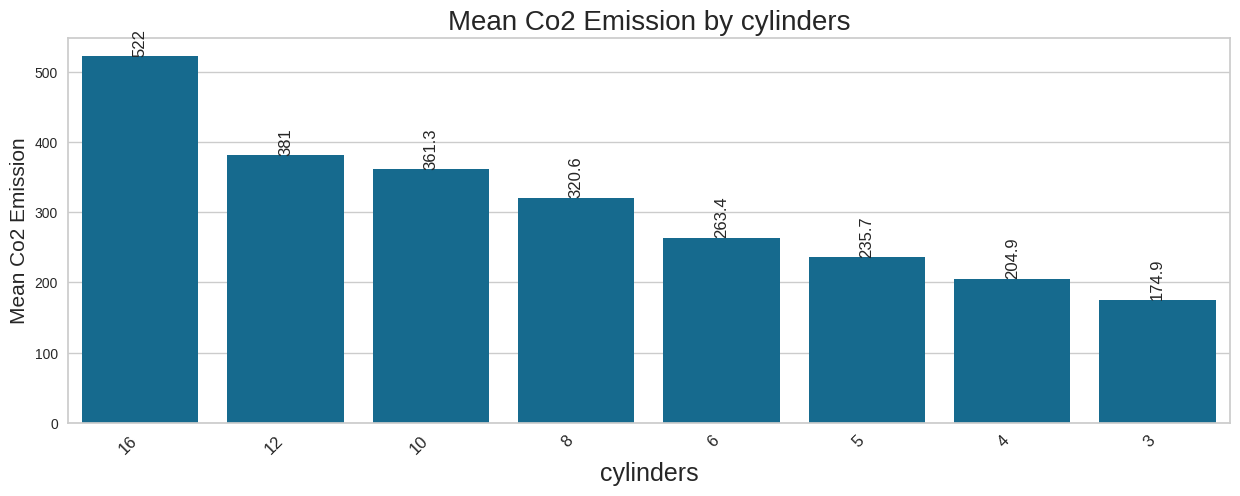

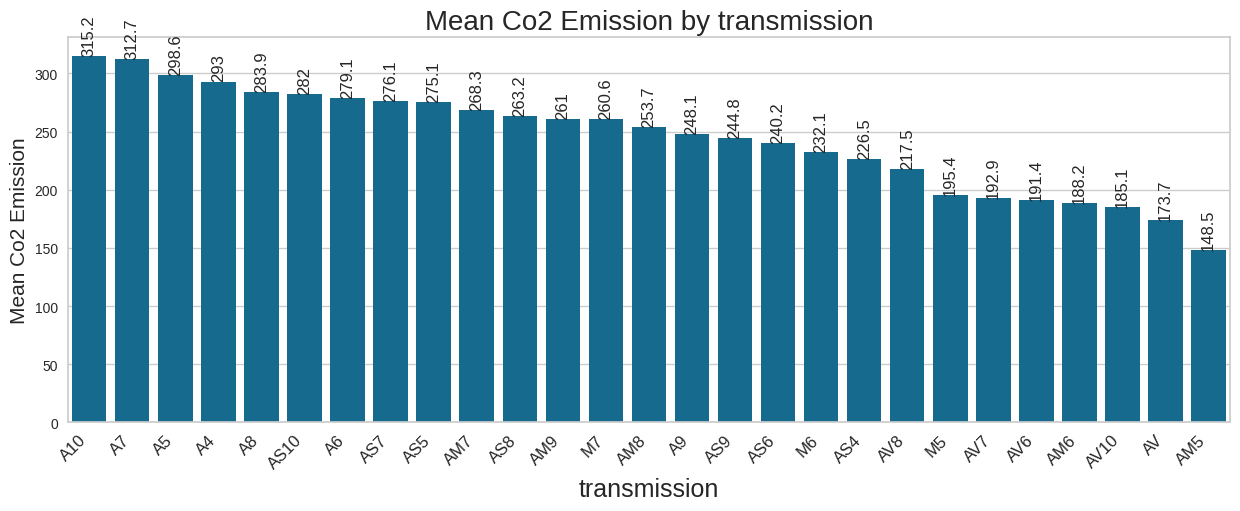

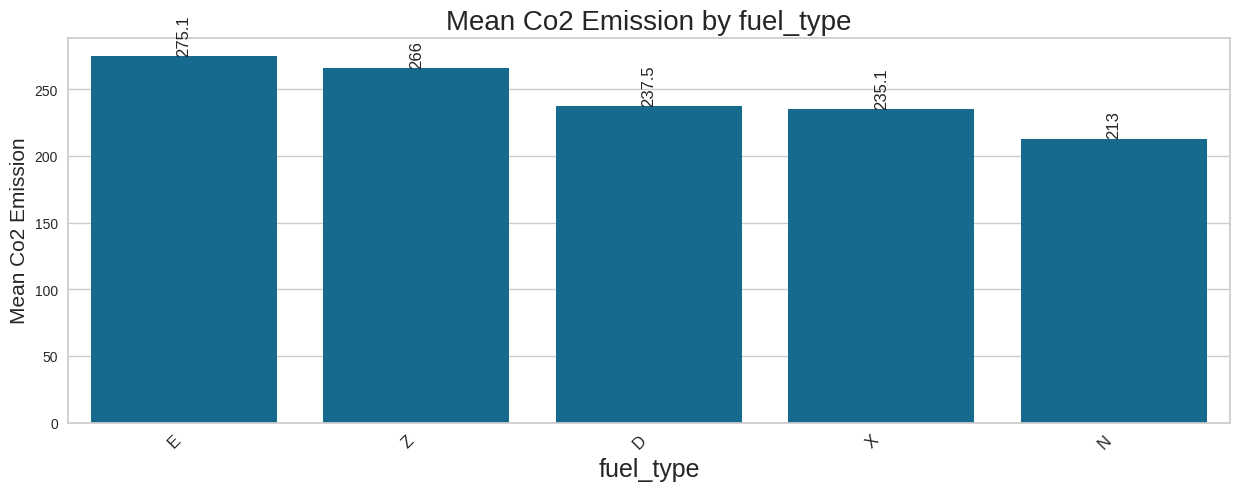

In [ ]:
def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['co2'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='co2', ascending=False)
        ax = sns.barplot(x=column, y='co2', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

plot_bar_with_co2(df, cat_features)

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe to avoid modifying it directly
df_labeled = df.copy()

# List of categorical columns
categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Display the first few rows of the labeled dataframe
print(df_labeled.head())

   make  model  vehicle_class  engine_size  cylinders  transmission  \
0     0   1057              0          2.0          4            14   
1     0   1057              0          2.4          4            25   
2     0   1058              0          1.5          4            22   
3     0   1233             11          3.5          6            15   
4     0   1499             11          3.5          6            15   

   fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
0          4             9.9            6.7             8.5   
1          4            11.2            7.7             9.6   
2          4             6.0            5.8             5.9   
3          4            12.7            9.1            11.1   
4          4            12.1            8.7            10.6   

   fuel_cons_comb_mpg  co2  
0                  33  196  
1                  29  221  
2                  48  136  
3                  25  255  
4                  27  244  


In [ ]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                7385 non-null   int64  
 1   model               7385 non-null   int64  
 2   vehicle_class       7385 non-null   int64  
 3   engine_size         7385 non-null   float64
 4   cylinders           7385 non-null   int64  
 5   transmission        7385 non-null   int64  
 6   fuel_type           7385 non-null   int64  
 7   fuel_cons_city      7385 non-null   float64
 8   fuel_cons_hwy       7385 non-null   float64
 9   fuel_cons_comb      7385 non-null   float64
 10  fuel_cons_comb_mpg  7385 non-null   int64  
 11  co2                 7385 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 692.5 KB


# **Corellation Matrix**

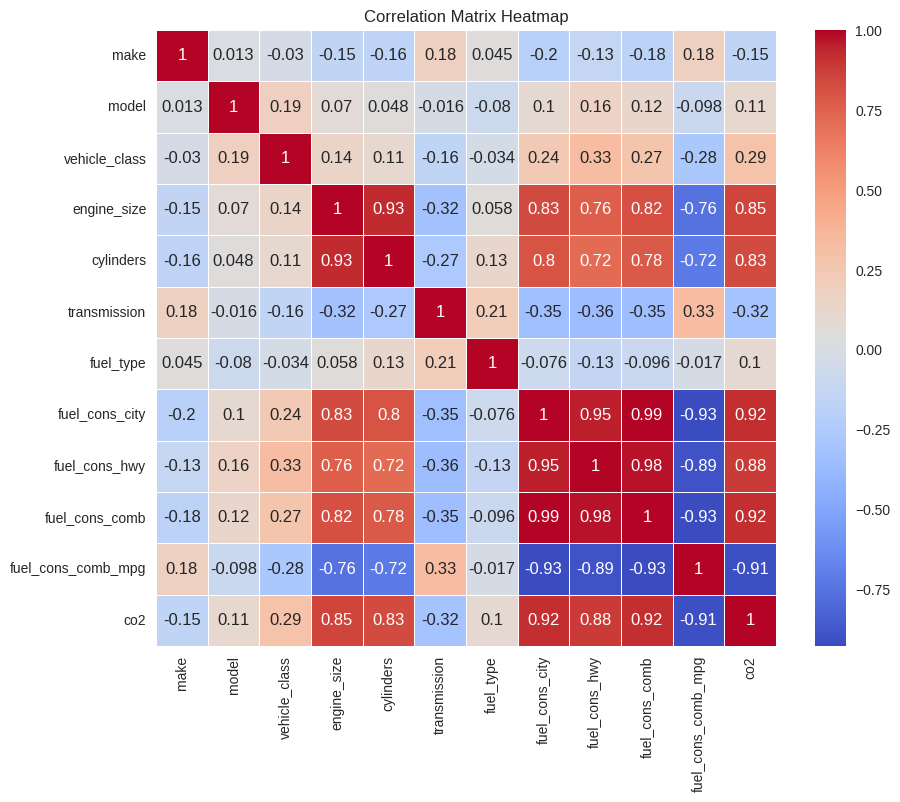

In [ ]:
correlation_matrix = df_labeled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Numerical Features**

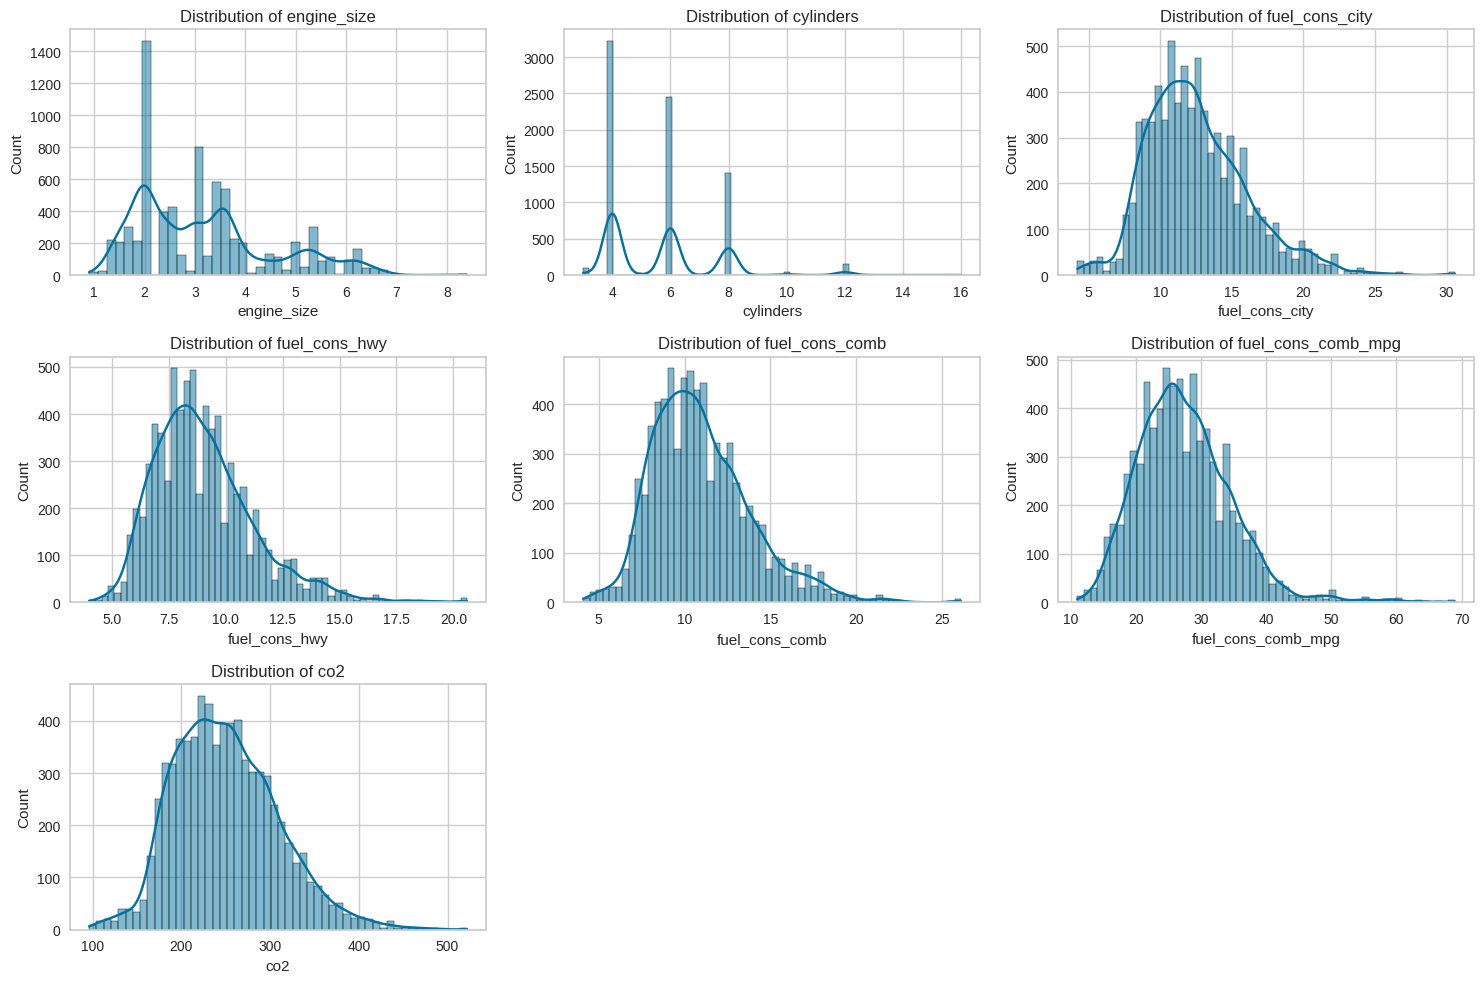

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

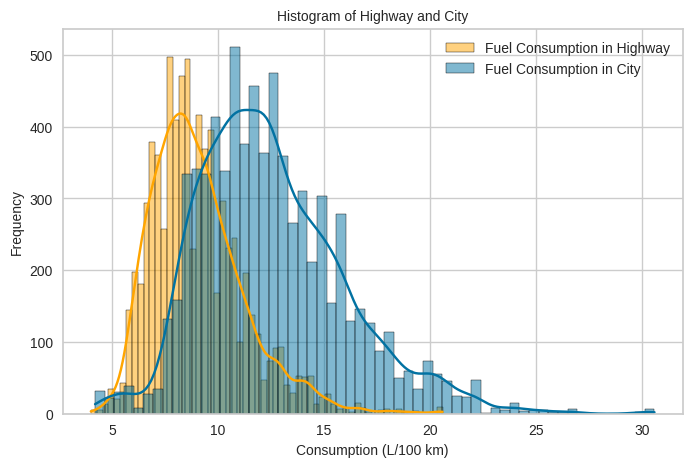

In [ ]:
# Consumption of Highway and City

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Highway and City', fontsize=10)
plt.legend()
plt.show()

Text(86.34722222222221, 0.5, 'CO2 Emissions (g/km)')

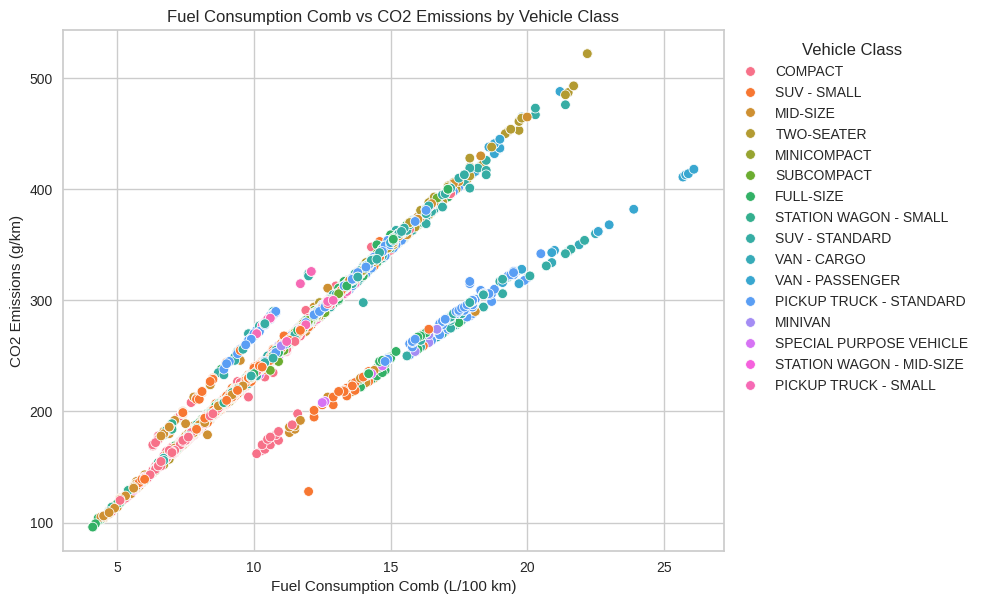

In [ ]:
# Target vs Fuel Consumption Combined (city+hwy)
# Hue: Vehicle Class

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='fuel_cons_comb',y='co2',hue='vehicle_class')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Vehicle Class')
plt.tight_layout()

plt.title('Fuel Consumption Comb vs CO2 Emissions by Vehicle Class')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')

# Vehicle class makes impact on overall fuel efficiency of vehicle as well lead to more emission
# Two-Seater,Mid Size, Passenger van, Cargo van, Pick Up Truck have most emission with lowest fuel efficiency
# Mini Van, SPV, Station Wagon are more fuel efficienct with low emission

Text(0, 0.5, 'CO2 Emissions (g/km)')

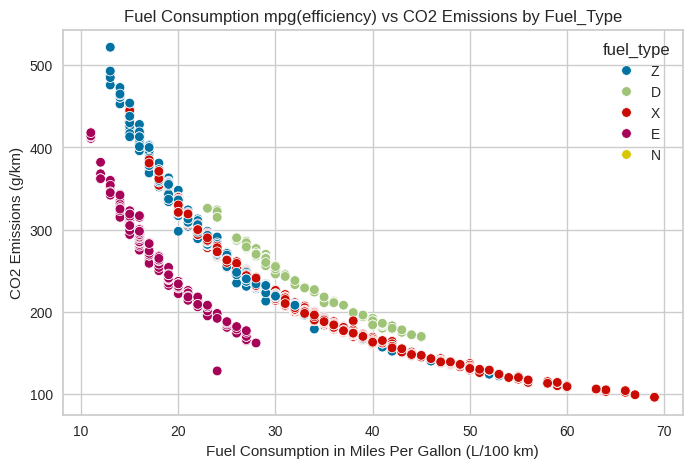

In [ ]:
# Target vs Fuel Consumption in Miles Per Gallon (mpg)
# Hue: Fuel Type

plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='fuel_cons_comb_mpg',y='co2',hue='fuel_type')

plt.title('Fuel Consumption mpg(efficiency) vs CO2 Emissions by Fuel_Type')
plt.xlabel('Fuel Consumption in Miles Per Gallon (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')

Text(86.34722222222221, 0.5, 'CO2 Emissions (g/km)')

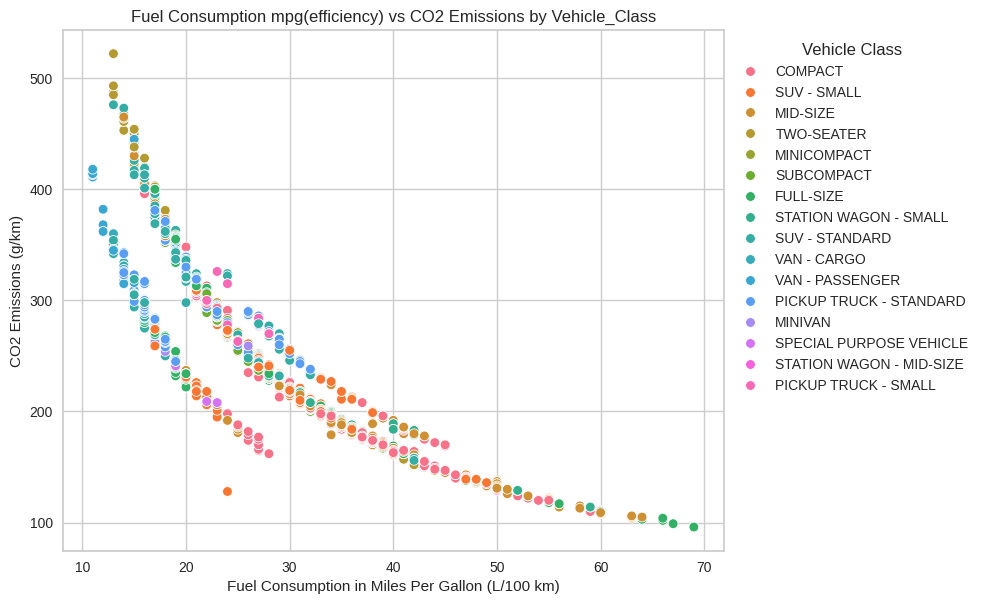

In [ ]:
# Target vs Fuel Consumption in Miles Per Gallon
# Hue: Vehicle Class

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='fuel_cons_comb_mpg',y='co2',hue='vehicle_class')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Vehicle Class')
plt.tight_layout()

plt.title('Fuel Consumption mpg(efficiency) vs CO2 Emissions by Vehicle_Class')
plt.xlabel('Fuel Consumption in Miles Per Gallon (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')

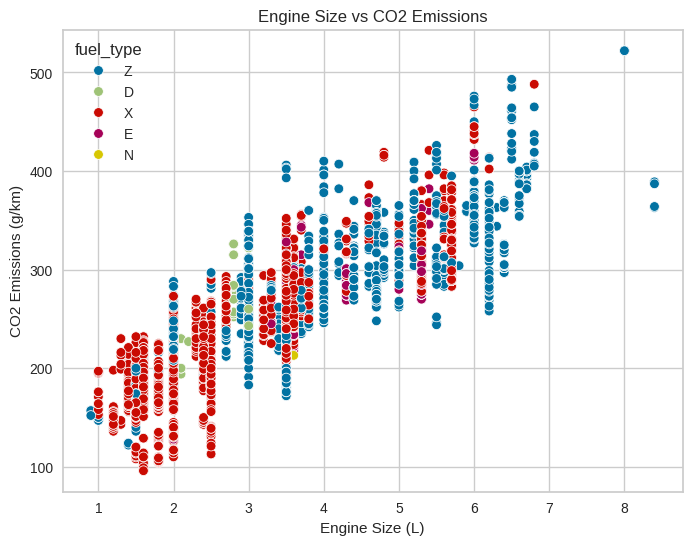

In [ ]:
# Target vs Engine Size

plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_size', y='co2', data=df, hue='fuel_type')
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

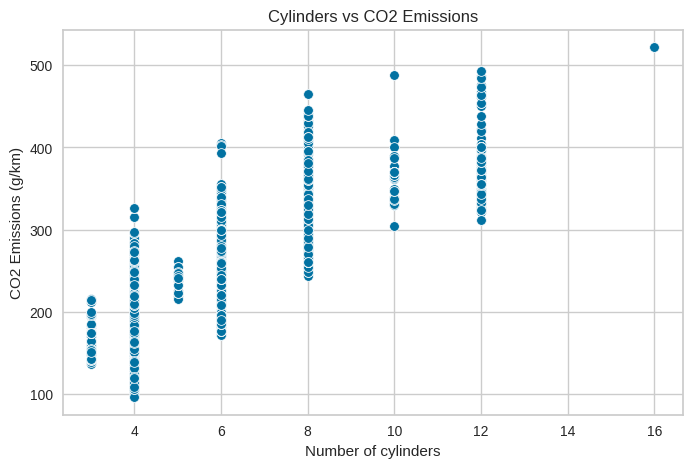

In [ ]:
# Target vs Cylinders Number

plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='cylinders',y='co2')

plt.title('Cylinders vs CO2 Emissions')
plt.xlabel('Number of cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

# **Correlations of Numerical Features**

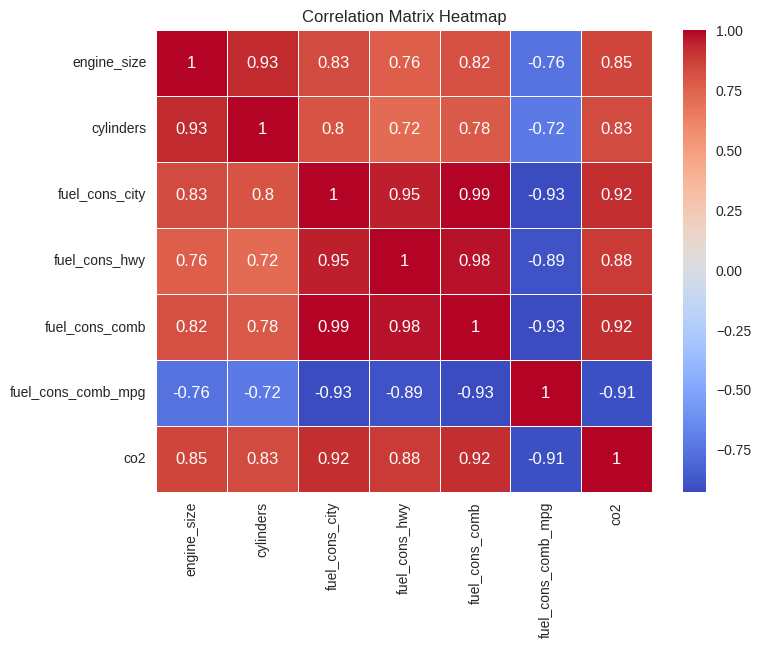

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

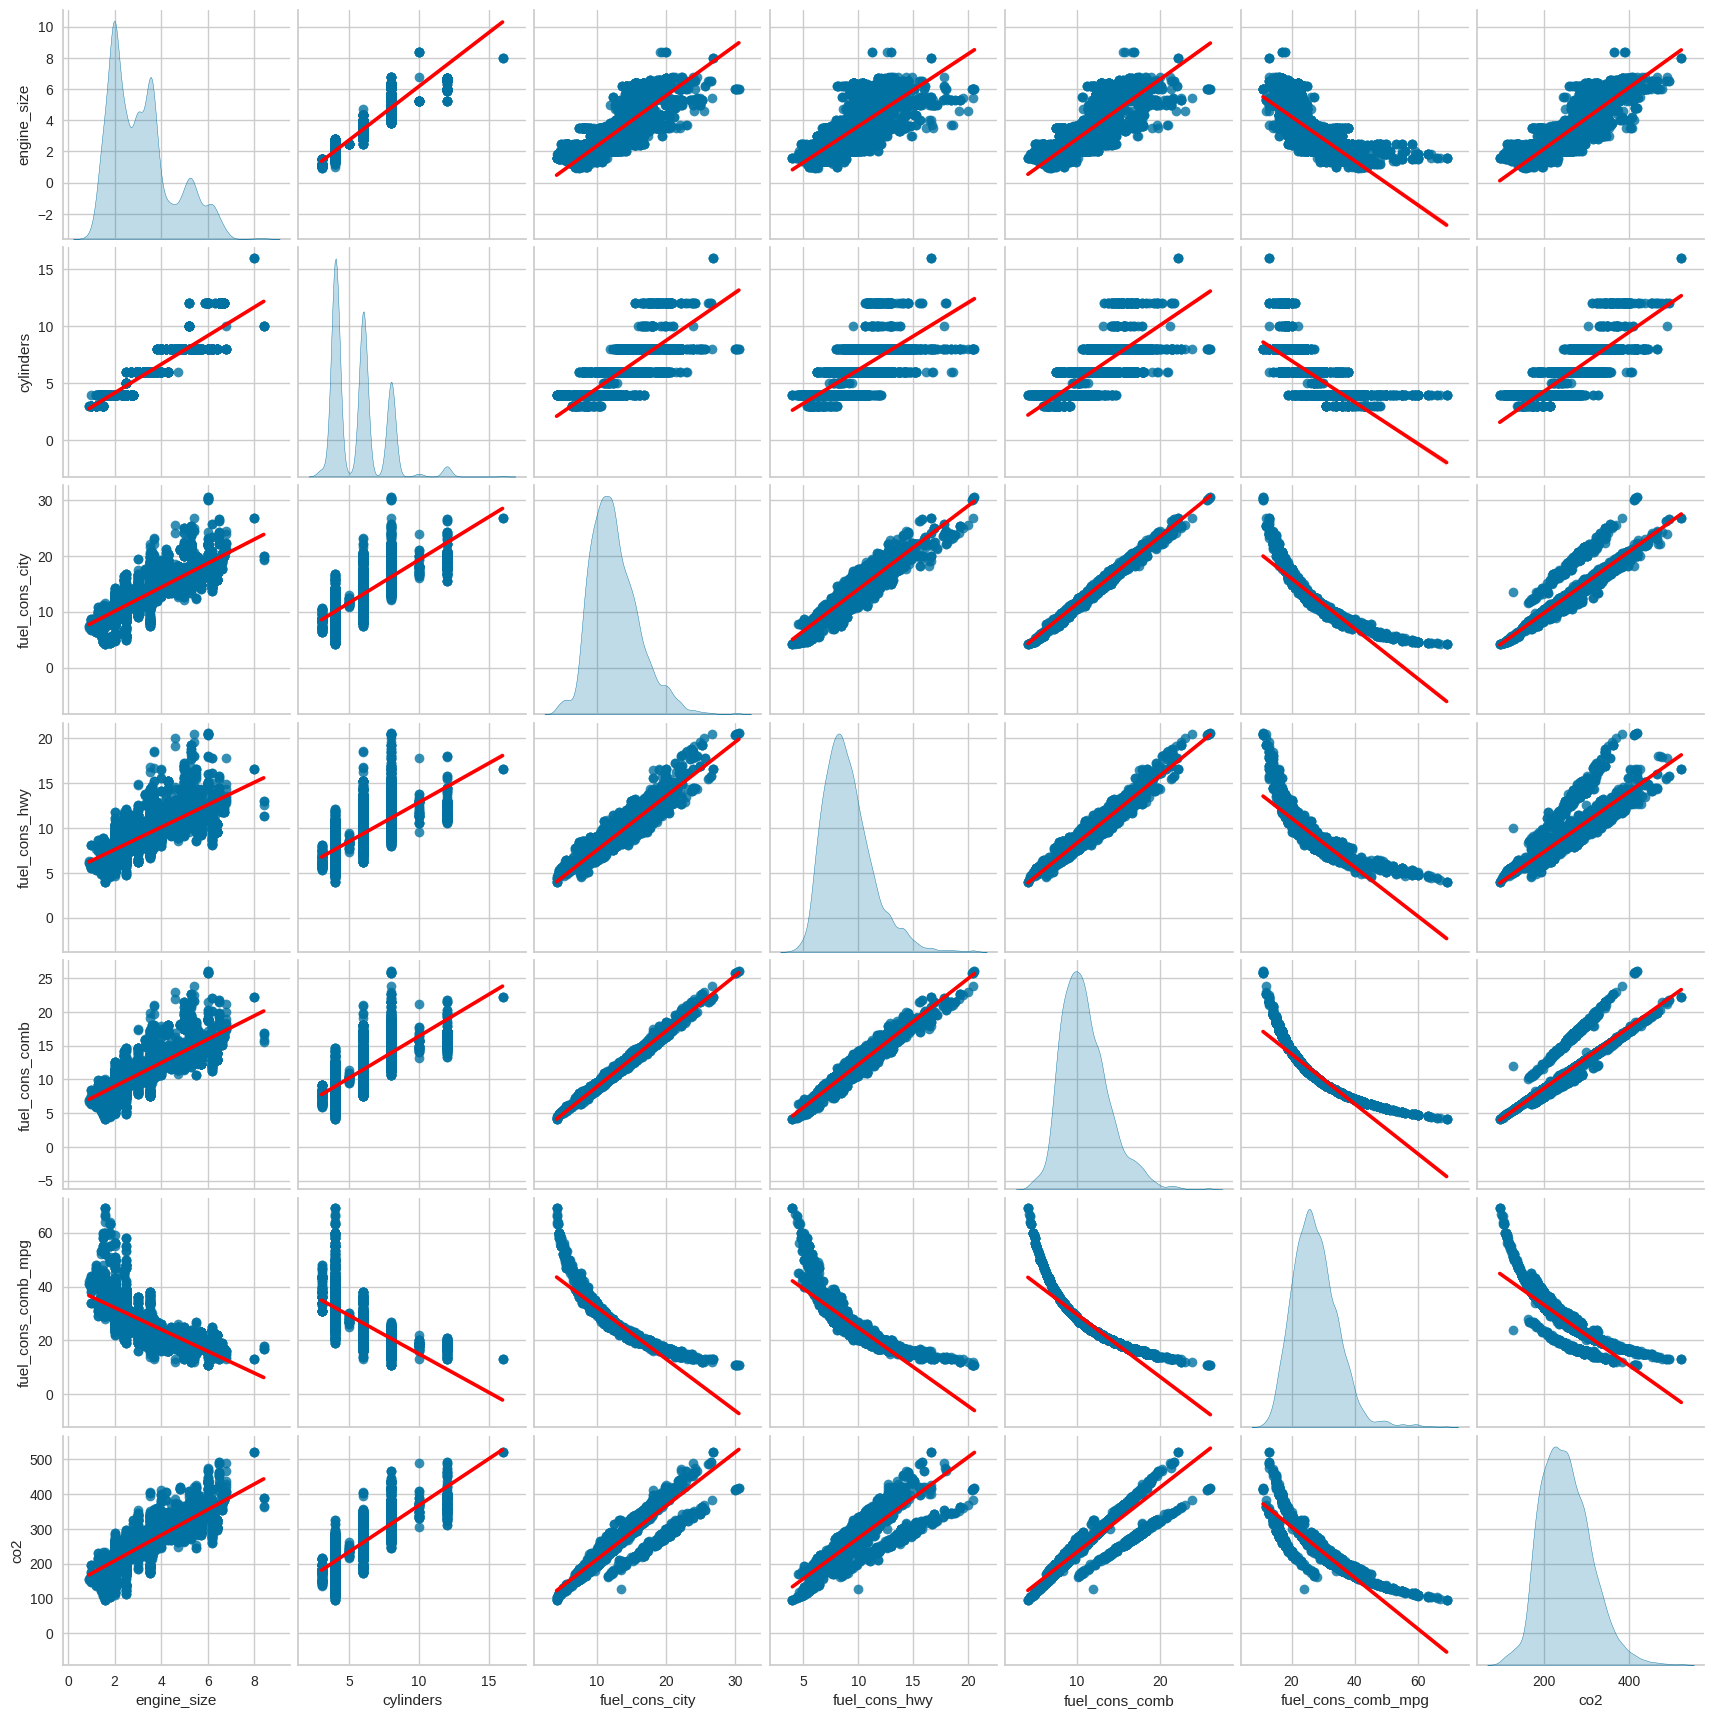

In [ ]:
# Pairplot for the dataframe

sns.pairplot(df,
             kind="reg",
             diag_kind="kde",
             plot_kws={"line_kws": {"color": "red"}}
            )

# **Outlier Analysis**

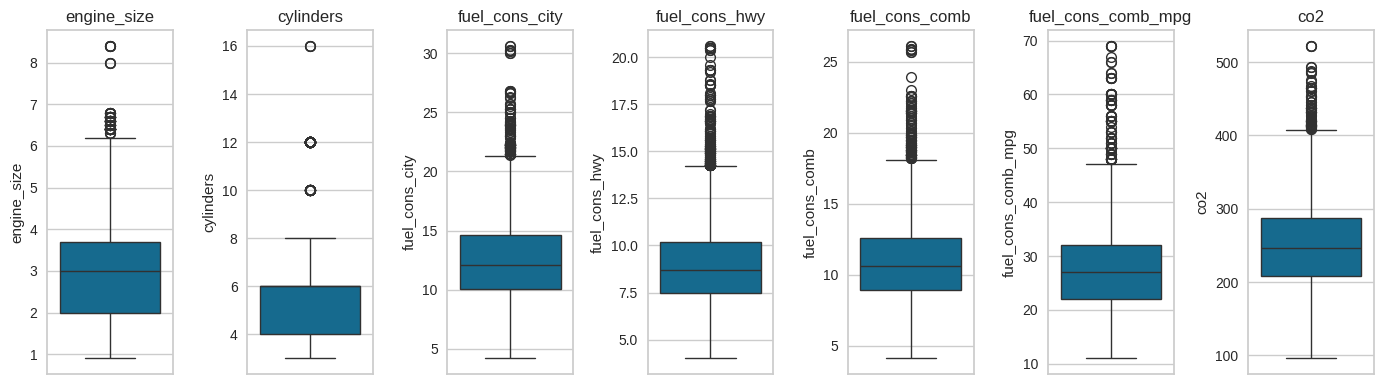

In [ ]:
# Checking Outliers

# Initialize the subplot counter
x = 0

# Create a figure with specified size
plt.figure(figsize=(16, 4))

# Loop through each numerical column and create a boxplot
for col in df.select_dtypes(include=['number']).columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_cons_comb_mpg,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


# **Skewness**

In [ ]:
# Calculate skewness for numeric features

# A skewness value greater than 1 indicates positive skewness,
# a skewness value less than -1 indicates negative skewness,
# and a skewness value close to zero indicates a relatively symmetric distribution.

num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
cylinders,1.110415
fuel_cons_hwy,1.079217
fuel_cons_comb_mpg,0.977034
fuel_cons_comb,0.893316
engine_size,0.809181
fuel_cons_city,0.809005


# **Simple Linear Regression Model**

<Axes: xlabel='engine_size', ylabel='co2'>

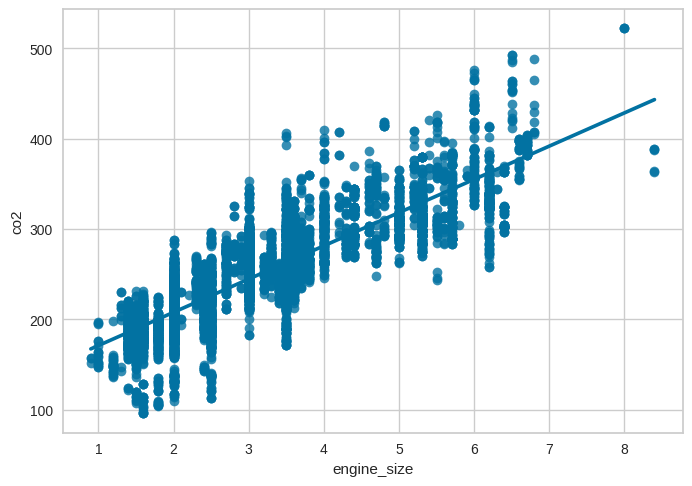

In [ ]:
# Check the correlation between independent feature (engine_size) and target variable (co2_emissions)

sns.regplot(x = 'engine_size', y = 'co2', data=df, ci=None)

# **Splitting the Data**

In [ ]:
# Split the selected independent feature (engine_size) and target variable (co2_emissions) for SIMPLE Linear Regression

X = df[['engine_size']]
y = df['co2']

# **Train | Test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5908, 1)
X_test shape: (1477, 1)
y_train shape: (5908,)
y_test shape: (1477,)


# **Model**

In [ ]:
from sklearn.linear_model import LinearRegression

model_simple_lin_reg = LinearRegression()

In [ ]:
model_simple_lin_reg.fit(X_train, y_train)

LinearRegression()

# **predicting test data**

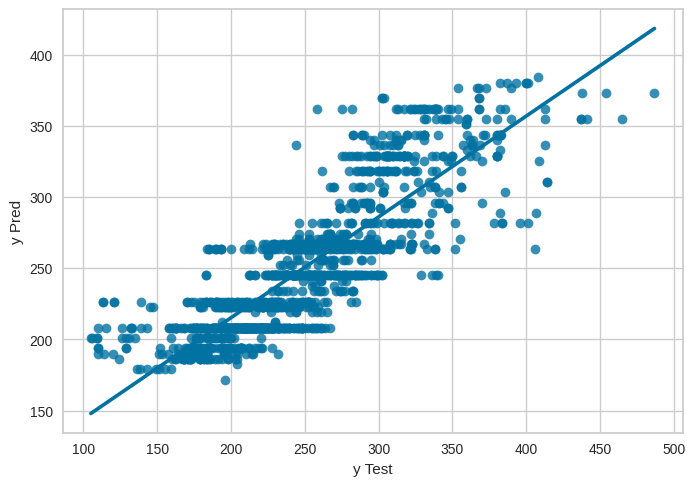

In [ ]:
# Predict using the model on the test data

y_train_pred = model_simple_lin_reg.predict(X_train)
y_pred = model_simple_lin_reg.predict(X_test)
sns.regplot(x=y_test, y=y_pred, ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

# **Evaluating the Model**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

,linear_train,linear_test
R2,0.724528,0.723812
mae,23.374987,22.927177
mse,941.716358,949.985253
rmse,30.687397,30.821831


In [ ]:
avg_co2= df['co2'].mean()
avg_co2

250.58469871360867

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

30.821830791462336

In [ ]:
rmse/avg_co2

0.12299965221215829

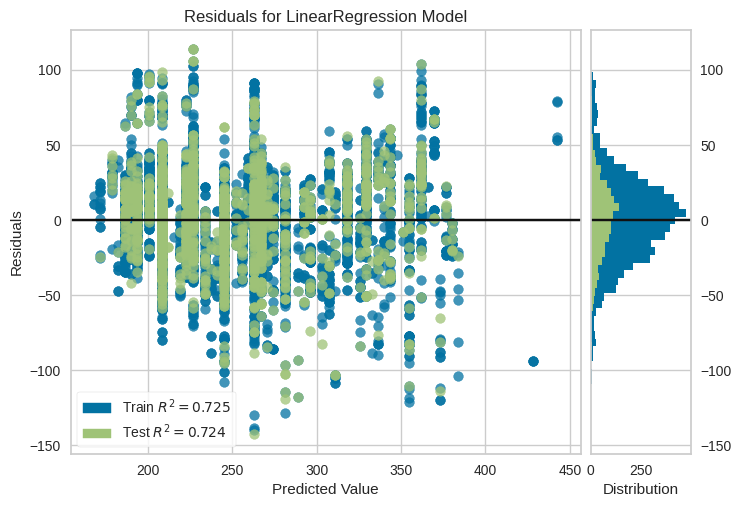

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# linear model and visualizer

model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [ ]:
# Comparing Actual y_test, Predicted_y and Residuals

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
7261,253,244.893111,8.106889
4489,344,296.150160,47.849840
1539,322,362.052081,-40.052081
3532,297,329.101120,-32.101120
6418,308,281.505289,26.494711
3703,406,263.199200,142.800800
5976,242,244.893111,-2.893111
4332,216,208.280933,7.719067
5015,246,222.925804,23.074196
2087,223,226.587022,-3.587022


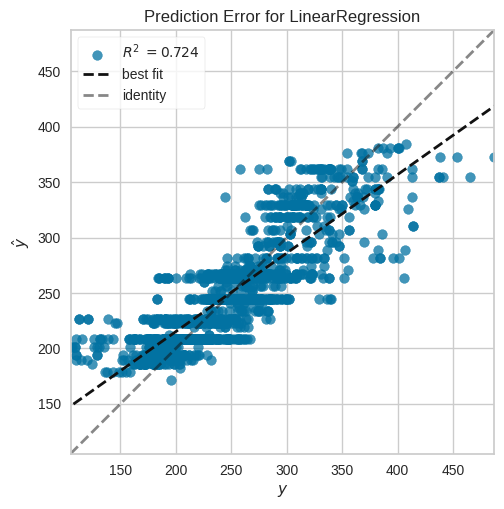

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [57]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure